In [93]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
# remove warning
import warnings
warnings.filterwarnings(action='ignore')
print('Libraries have been imported')

Libraries have been imported


In [94]:
from sklearn.metrics import mean_squared_error
plt.style.use('fivethirtyeight')
color_par = sns.color_palette()

In [95]:
Dengue = pd.read_excel('DengueAndClimateBangladesh.xlsx')
data = Dengue.copy()
data.head(100)

,DATE,MIN,MAX,HUMIDITY,RAINFALL,DENGUE CASES
0,2008-01-01,12.993929,25.059539,78.824885,22.63,0
1,2008-02-01,13.658286,26.383448,72.602956,12.54,0
2,2008-03-01,20.411250,31.367558,76.903226,38.84,0
3,2008-04-01,22.771889,34.031619,73.943810,101.17,0
4,2008-05-01,23.945625,34.171060,77.360369,206.35,0
...,...,...,...,...,...,...
95,2015-12-01,15.025089,26.060829,80.350230,5.98,75
96,2016-01-01,12.370000,25.199171,79.868203,0.25,13
97,2016-02-01,17.459238,29.574187,76.972414,9.12,3
98,2016-03-01,20.838929,32.874286,73.689401,88.76,17


In [96]:
# Checking the number of  rows and columns
print('Shape of data: {}'.format(data.shape))
print('Number of rows: {}'.format(data.shape[0]))
print('Number of columns: {}'.format(data.shape[1]))

Shape of data: (192, 6)
Number of rows: 192
Number of columns: 6


In [97]:
# Checking the number of  null values
data.isnull().sum()

DATE            0
MIN             0
MAX             0
HUMIDITY        0
RAINFALL        0
DENGUE CASES    0
dtype: int64

In [98]:
# Counting the number of distinct elements.
data.nunique().sort_values(ascending=False)

DATE            192
HUMIDITY        158
RAINFALL        155
MIN             152
MAX             152
DENGUE CASES    132
dtype: int64

In [99]:
# printing information about the DataFrame.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   DATE          192 non-null    datetime64[ns]
 1   MIN           192 non-null    float64       
 2   MAX           192 non-null    float64       
 3   HUMIDITY      192 non-null    float64       
 4   RAINFALL      192 non-null    float64       
 5   DENGUE CASES  192 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 9.1 KB


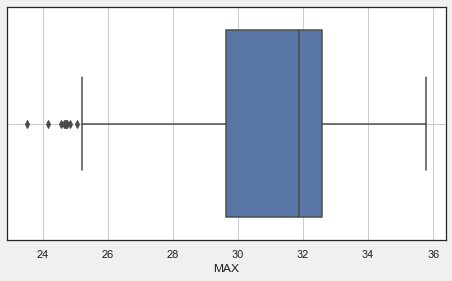

In [100]:
# Plotting a boxplot using the Age column
plt.figure(figsize=(7, 4))
sns.set(style='white')
sns.boxplot(data.MAX)
plt.grid()
plt.show()

<Figure size 720x720 with 0 Axes>

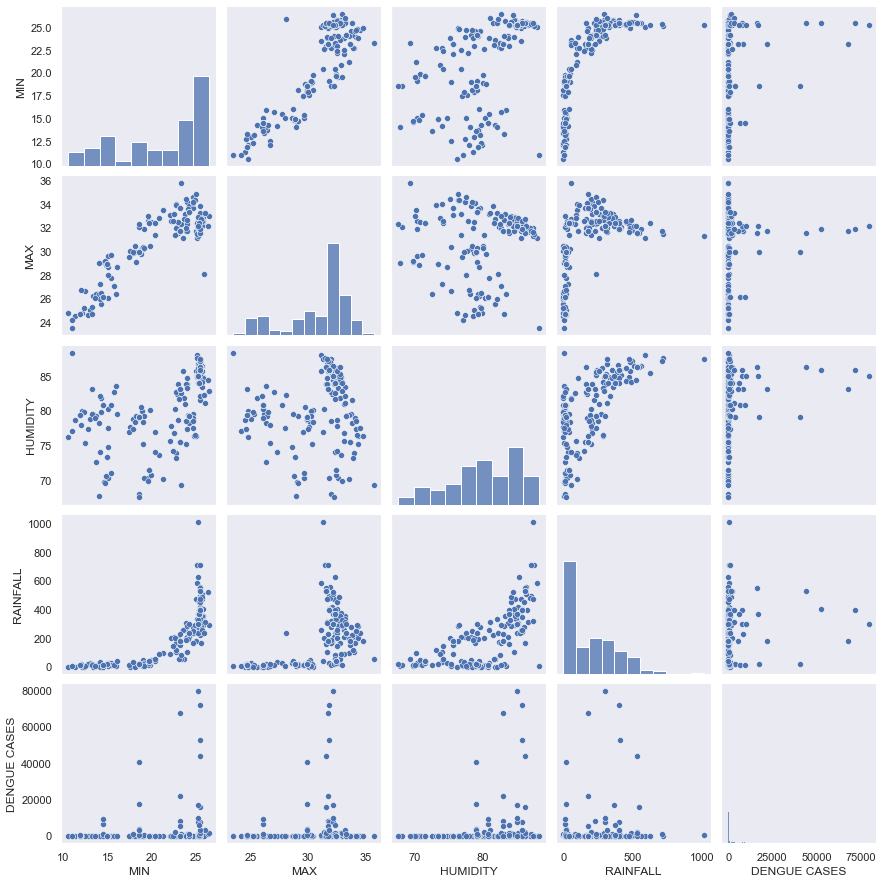

In [101]:
# Plotting pairwise relationships in dataset
plt.figure(figsize=(10, 10))
sns.set(style='dark')
sns.pairplot(data)
plt.grid()
plt.show()

<AxesSubplot:>

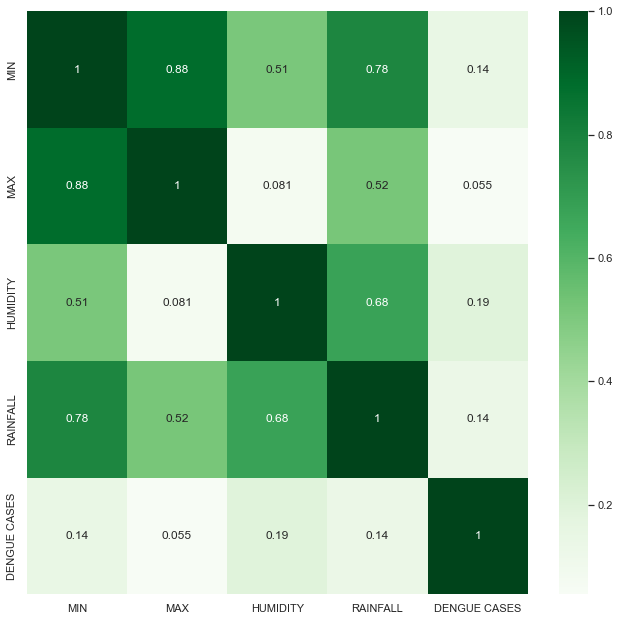

In [102]:
# Checking the correlation
correlation=data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, annot=True, cmap='Greens')

In [103]:
data.columns

Index(['DATE', 'MIN', 'MAX', 'HUMIDITY', 'RAINFALL', 'DENGUE CASES'], dtype='object')

In [104]:
# Unnecessary columns are omitted.
data.drop(columns=['MIN', 'MAX', 'HUMIDITY', 'RAINFALL'], inplace=True)

In [105]:
data['DATE'] = pd.to_datetime(data['DATE'])
data.set_index('DATE', inplace=True)

In [106]:
data

,DENGUE CASES
DATE,
2008-01-01,0
2008-02-01,0
2008-03-01,0
2008-04-01,0
2008-05-01,0
...,...
2023-08-01,71976
2023-09-01,79598
2023-10-01,67769


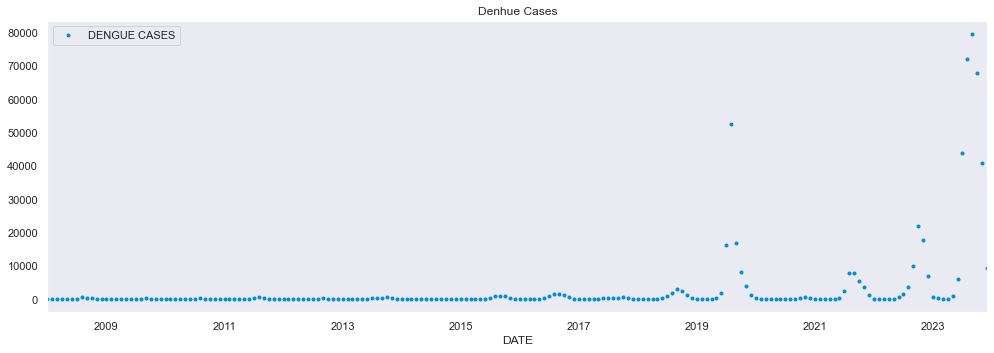

In [107]:
data.plot(figsize=(15,5),style='.',color = color_par[0],title = 'Denhue Cases')
plt.show()

In [109]:
data['month'] = data.index.month
data['quarter'] = data.index.quarter
data['year'] = data.index.year


In [110]:
data.head(5)

,DENGUE CASES,month,quarter,year
DATE,,,,
2008-01-01,0,1,1,2008
2008-02-01,0,2,1,2008
2008-03-01,0,3,1,2008
2008-04-01,0,4,2,2008
2008-05-01,0,5,2,2008


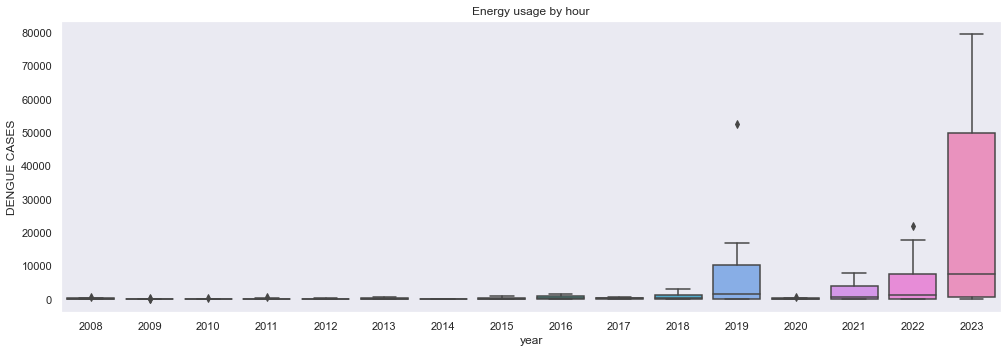

In [111]:
plt.subplots(figsize=(15,5))
sns.boxplot(data=data,x='year',y='DENGUE CASES')
plt.title('Energy usage by hour')
plt.show()

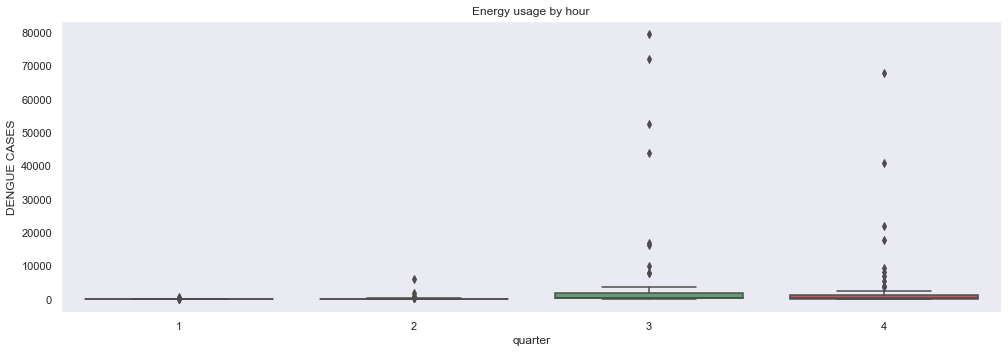

In [112]:
plt.subplots(figsize=(15,5))
sns.boxplot(data=data,x='quarter',y='DENGUE CASES')
plt.title('Energy usage by hour')
plt.show()

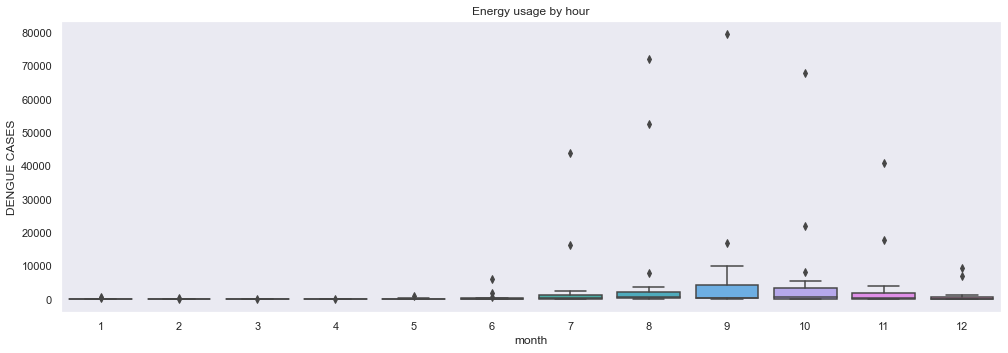

In [113]:
plt.subplots(figsize=(15,5))
sns.boxplot(data=data,x='month',y='DENGUE CASES')
plt.title('Energy usage by hour')
plt.show()

## model

In [114]:
train_set = data.loc[data.index<'01-01-2020']
test_set = data.loc[data.index>='01-01-2020']

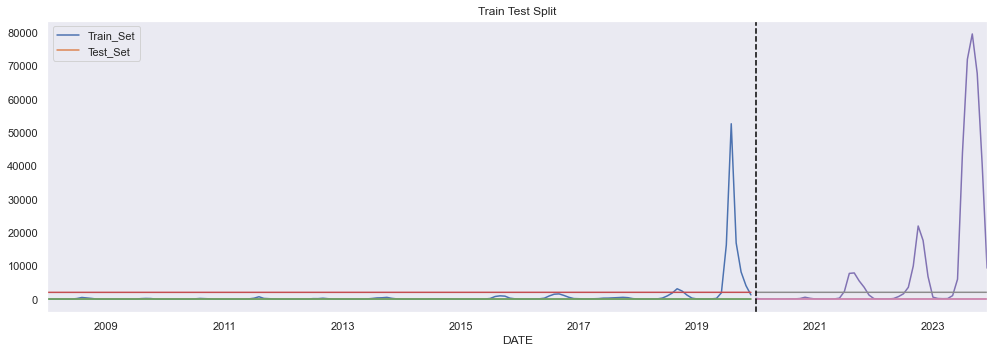

In [115]:
fig,ax = plt.subplots(figsize=(15,5))
train_set.plot(ax=ax)
test_set.plot(ax=ax)
ax.axvline('01-01-2020',color = 'Black',ls = '--')
plt.legend(['Train_Set','Test_Set'])
plt.title('Train Test Split')
plt.show()

In [116]:
x_train = train_set.drop('DENGUE CASES',axis = 1)
y_train = train_set['DENGUE CASES']

x_test = test_set.drop('DENGUE CASES',axis = 1)
y_test = test_set['DENGUE CASES']

In [117]:
x_test.shape, x_train.shape

((48, 3), (144, 3))

In [118]:
y_train.shape

(144,)

In [119]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [120]:
model = GradientBoostingRegressor()
model.fit(x_train,y_train)
a = model.score(x_train,y_train)
b = model.score(x_test,y_test)
print("trina is ",a,"test is ",b)

trina is  0.9991575503226406 test is  -0.07247783361203863


In [121]:
pre = model.predict(x_test)
pre

array([   96.2054213 ,    96.2054213 ,    96.2054213 ,   100.44929923,
         199.93515032,  1861.56314061, 16296.01403103, 51935.46374562,
       17144.78564564,  8256.56622148,  3968.13817813,  1267.07799348,
          96.2054213 ,    96.2054213 ,    96.2054213 ,   100.44929923,
         199.93515032,  1861.56314061, 16296.01403103, 51935.46374562,
       17144.78564564,  8256.56622148,  3968.13817813,  1267.07799348,
          96.2054213 ,    96.2054213 ,    96.2054213 ,   100.44929923,
         199.93515032,  1861.56314061, 16296.01403103, 51935.46374562,
       17144.78564564,  8256.56622148,  3968.13817813,  1267.07799348,
          96.2054213 ,    96.2054213 ,    96.2054213 ,   100.44929923,
         199.93515032,  1861.56314061, 16296.01403103, 51935.46374562,
       17144.78564564,  8256.56622148,  3968.13817813,  1267.07799348])

In [122]:
from xgboost import XGBRegressor
#from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.linear_model import LogisticRegression

In [123]:
mean_squared_error(pre,y_test)

388171313.16649824

In [125]:
np.sqrt(mean_squared_error(pre,y_test))

19702.063677861217